#### Imports

In [1]:
import pkg_resources
import robustsp as rsp
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
%matplotlib inline
ecg_ppg_datapath = pkg_resources.resource_filename('robustsp', 'data/ECG-PPG_HRV_example.mat')

ppg_data = scipy.io.loadmat(ecg_ppg_datapath)

ecg_data = scipy.io.loadmat(ecg_ppg_datapath)

ppg_signal = ppg_data['ppg_signal'].flatten()

ecg_signal = ecg_data['ecg_signal'].flatten()

ppg_pos = ppg_data['ppg_pos'].flatten()

ecg_pos = ecg_data['ecg_pos'].flatten()

matplotlib.rcParams['figure.figsize'] = [10,10]

In [2]:
t_ppg = np.linspace(0,len(ppg_signal),len(ppg_signal))

t_ecg = np.linspace(0,len(ecg_signal),len(ecg_signal))

#### Plot PPG and ECG (referece) Signals

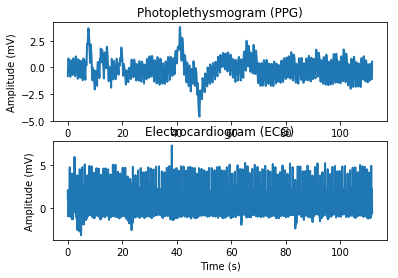

In [3]:
plt.subplot(2,1,1)
plt.plot(t_ppg/1000,ppg_signal,lw=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Photoplethysmogram (PPG)')

plt.subplot(2,1,2)
plt.plot(t_ecg/1000,ecg_signal,lw=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
a=plt.title('Electrocardiogram (ECG)')

#### Plot inter-beat-intervals

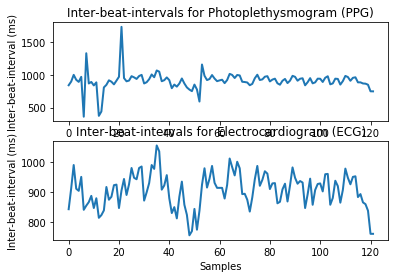

In [4]:
ibi_ppg = np.diff(ppg_pos)

ibi_ecg = np.diff(ecg_pos)

plt.subplot(2,1,1)
plt.plot(ibi_ppg,lw=2)
plt.xlabel('Samples')
plt.ylabel('Inter-beat-interval (ms)')
plt.title('Inter-beat-intervals for Photoplethysmogram (PPG)')

plt.subplot(2,1,2)
plt.plot(ibi_ecg,lw=2)
plt.xlabel('Samples')
plt.ylabel('Inter-beat-interval (ms)')
_=plt.title('Inter-beat-intervals for Electrocardiogram (ECG)')

#### BIP-Tau Data Cleaning of PPG inter-beat-intervals


Selected ARMA model: MA(11)
estimated coefficients: 
 [ 0.71771025 -0.00949885  0.31573183  0.53740187  0.04330616 -0.0755072
  0.15075173 -0.00806568 -0.15228038  0.19088338  0.21311771]


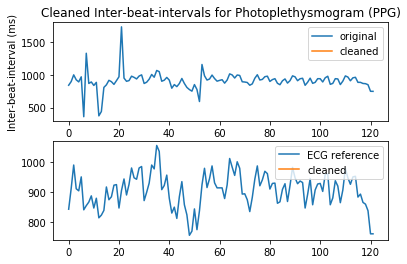

In [5]:
#### Selected ARMA model

p = 0
q = 11

# BIP-ARMA parameter estimation and data cleaning

flipped_sig = ibi_ppg[::-1]-np.median(ibi_ppg)

result = rsp.arma_est_bip_tau(flipped_sig,p,q)

ibi_ppg_cl = result['cleaned_signal'][::-1]+np.median(ibi_ppg)

print("""
Selected ARMA model: MA(11)
estimated coefficients: 
""", result['ma_coeffs'])

plt.subplot(2,1,1)
plt.plot(ibi_ppg,label='original')
plt.plot(ibi_ppg_cl,label='cleaned')
plt.xlabel('Samples')
plt.ylabel('Inter-beat-interval (ms)')
plt.title('Cleaned Inter-beat-intervals for Photoplethysmogram (PPG)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(ibi_ecg,label='ECG reference')
plt.plot(ibi_ppg_cl,label='cleaned')
plt.legend()
plt.show()